<a href="https://colab.research.google.com/github/Viniciusp67/Algoritmos-de-Classifica-o-Agrupamento-e-Associa-o/blob/main/Kmeans_Teste2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [14]:
df = pd.read_csv("/Wholesale_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
X = df[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
k_values = range(2, 11)
silhouette_scores = []
dbi_scores = []
chi_scores = []

In [18]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    silhouette_scores.append(silhouette_score(X_scaled, labels))
    dbi_scores.append(davies_bouldin_score(X_scaled, labels))
    chi_scores.append(calinski_harabasz_score(X_scaled, labels))

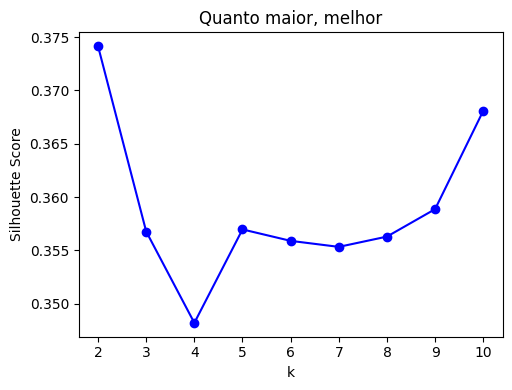

In [19]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Quanto maior, melhor')

plt.tight_layout()
plt.show()

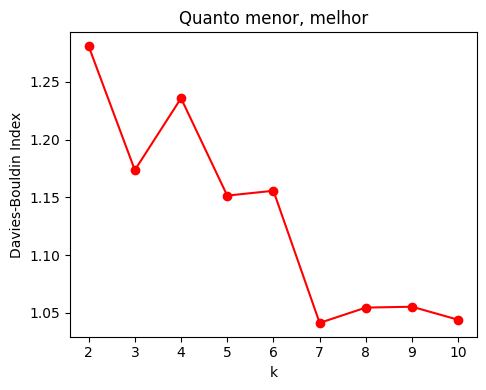

In [20]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 2)
plt.plot(k_values, dbi_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Index')
plt.title('Quanto menor, melhor')

plt.tight_layout()
plt.show()

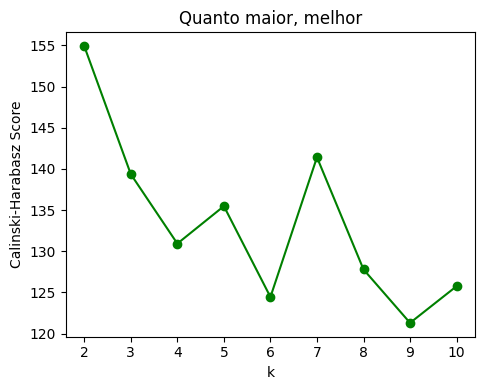

In [21]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 3)
plt.plot(k_values, chi_scores, 'go-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Quanto maior, melhor')

plt.tight_layout()
plt.show()

In [22]:
results = pd.DataFrame({
    'k': k_values,
    'Silhouette': silhouette_scores,
    'Davies-Bouldin': dbi_scores,
    'Calinski-Harabasz': chi_scores
})
print(results)

    k  Silhouette  Davies-Bouldin  Calinski-Harabasz
0   2    0.374157        1.280919         154.898953
1   3    0.356769        1.173637         139.349412
2   4    0.348195        1.235855         130.917905
3   5    0.356964        1.151540         135.468417
4   6    0.355890        1.155741         124.433833
5   7    0.355327        1.041352         141.402102
6   8    0.356291        1.054597         127.779308
7   9    0.358866        1.055334         121.289432
8  10    0.368093        1.044043         125.745657
